In [43]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # conventional alias
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data analysis
## Loading dataset into a pandas DataFrame
The dataset consists of a table - columns are attributes, rows are instances (individual observations). In order to do computations easily and efficiently and not to reinvent wheel we can use a suitable tool - pandas. So the first step is to obtain the dataset and load it into a DataFrame.

Fortunately the dataset is already available via the scikit-learn package which gives it to us as a python data structure:

In [15]:
dataset = load_boston()

<aside class="notice">
If you want to use you own data, simple drag your file from the data menu in the above cell and delete the dataset = load_boston() command
</aside>

In [16]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

The result of load_boston() is a map-like object with four components: ['target', 'data', 'DESCR', 'feature_names']:

* dataset['target'] - 1D numpy array of target attribute values
* dataset['data'] - 2D numpy array of attribute values
* dataset['feature_names'] - 1D numpy array of names of the attributes
* dataset['DESCR'] - text description of the dataset

So it is easy to convert it to a pandas DataFrame.
The process of cleaning and preparing data always depends on data at hand.

## Data summary

Now we have the data available in Python waiting for us to explore them!

We'd like to get a simple report.

### Data size
The most basic thing is to get the data size: number of attributes (features) and instances (data points).

In [17]:
instance_count, attr_count = df.shape

In fact the attributes can be divided to input ones and target ones. In this case there's just one target and several inputs.


### Distributions of each attribute
Next we'd like to know how values of each attributes are distributed. We can readily use the basic statistics (count, mean, min, max, quartiles) via the pandas df.describe() function. These can also be computed separately: ```df.count()```, ```df.min()```, ```df.max()```, ```df.median()```, ```df.quantile(q)```
Other statistics such as mode are also available separately, eg. ```df.mode()```:

In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Attribute Information
1. **CRIM**      per capita crime rate by town
2. **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**     proportion of non-retail business acres per town
4. **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**       nitric oxides concentration (parts per 10 million)
6. **RM**        average number of rooms per dwelling
7. **AGE**       proportion of owner-occupied units built prior to 1940
8. **DIS**       weighted distances to five Boston employment centres
9. **RAD**       index of accessibility to radial highways
10. **TAX**      full-value property-tax rate per USD 10,000
11. **PTRATIO**  pupil-teacher ratio by town
12. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**    % lower status of the population
14. **MEDV**     Median value of owner-occupied homes in $1000's

### Missing values
It is good to know if some values are missing. In pandas missing values are represented by np.nan. The ```pd.isnull(df).any()``` command tells us whether each column contains any missing values, ```pd.isnull(df).sum()``` then counts the missing values.

There are (un)fortunately no missing values in this dataset.

### Corelations between attributes
It is useful to know whether some pairs of attributes are correlated and how much. For many ML algorithms correlated features might make some trouble, ideally we should try to get a set of independent features. However, there exist some methods for deriving features that are as uncorrelated as possible (google for PCA, ICA, autoencoder, dimensionality reduction, manifold learning, etc.).

Pandas offers us out-of-the-box three various correlation coefficients via the ```DataFrame.corr()``` function: standard Pearson correlation coefficient, Spearman rank correlation, Kendall Tau correlation coefficient.

In [19]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Practically it returns another DataFrame with pairs of all attributes and values in range [-1; 1], 1 meaning total correlation, -1 negative correlation, 0 no correlation. Note that the three methods differ in computational complexity. A quick test shows a difference:

In [20]:
%timeit df.corr(method='pearson')

The slowest run took 6.58 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 309 µs per loop


In [21]:
%timeit df.corr(method='spearman')

100 loops, best of 3: 5.53 ms per loop


In [22]:
%timeit df.corr(method='kendall')

1 loops, best of 3: 1.09 s per loop


```%timeit``` is a command in ipython useful for micro-benchmarking.

### Predictivity of attributes
Besides correlation between attributes, we'd like to know the correlation between input attributes and the target one, ie. how each input attribute is able to predict the target. It is called *predictivity*.

In [23]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)

Since we might be also interested in strong negative correlations it would be better to sort the correlations by the absolute value:

In [24]:
corr_with_target[abs(corr_with_target).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

The ```np.argsort()``` function returns the array indices that when aplied to the array return an array in sorted order.

### Important correlations between input attributes
It might be interesting to select some strong correlations between attribute pairs. With a bit of Python magic it is possible:

In [25]:
attrs = pearson.iloc[:-1,:-1] # all except target

# only important correlations and not auto-correlations
threshold = 0.5

# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [26]:
unique_important_corrs

,attribute pair,correlation
10,"(RAD, TAX)",0.910228
8,"(DIS, NOX)",-0.769230
15,"(INDUS, NOX)",0.763651
16,"(AGE, DIS)",-0.747881
7,"(AGE, NOX)",0.731470
6,"(INDUS, TAX)",0.720760
18,"(DIS, INDUS)",-0.708027
2,"(NOX, TAX)",0.668023
19,"(DIS, ZN)",0.664408
22,"(AGE, INDUS)",0.644779


## Visualization

In order to better understand the dataset we can make things visual. Basically we generate a lot of various 1D or 2D plots and look at it hoping to find something interesting. Indeed, we, humans, are being highly trained to get information and find patterns visually.

There are Python packages that can help us with this task very much. In particular, we use the standard *matplotlib* package and additionally *seaborn* for some extra statistical plots and for more elegant and comprehensible plot styles.

While examining the dataset interactively we can utilize the default interactive plotting features. However for reproducibility and publishing our results eg. on a blog, we'd like to export the plots to images, eg. PNG. Python can help us to automate the things.

Attribute correlations

We'd like to plot the value of correlation of pairs of attributes, ie. a 2D matrix. To avoid duplicates (due to pair symmetry) just one triangle is enough (eg. lower triangular matrix). The range of correlation value is [-1; 1], thus the value can be color coded using a diverging color map - one hue for each sign (eg. red/blue) and saturation for absolute value.

The seaborn package offer ```corrplot()``` which is exactly what we need (example).

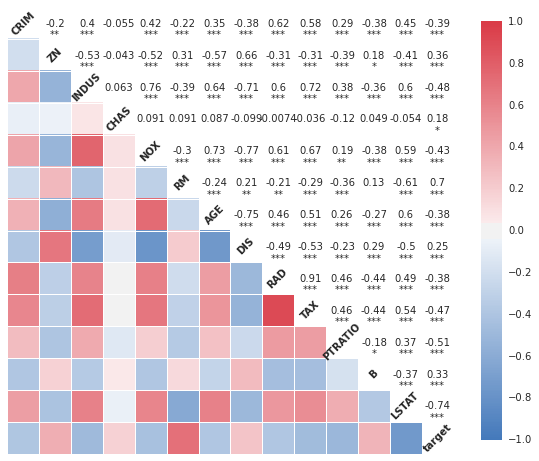

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 10, n=3, as_cmap=True)
sns.corrplot(df, ax=ax, cmap=cmap) # compute and plot the pair-wise correlations

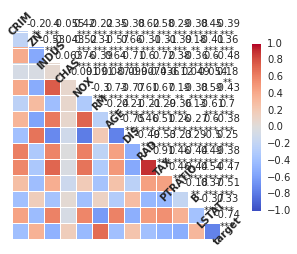

In [28]:
sns.corrplot(df)

The lower triangle show the correlation values as colored squares, on the diagonal are the attribute names and in the upper triangle are the actual correlation values and significance represented by stars. Also there is a colorbar.

We can change the correlation method with the ```method``` parameter (the same variants available as in pandas).

We might want to adjust the plot to look better. The default font size is a quite big and looks ugly. I'm not aware of a clean way to decrease it, thus as a work-around we can enlarge the plot.

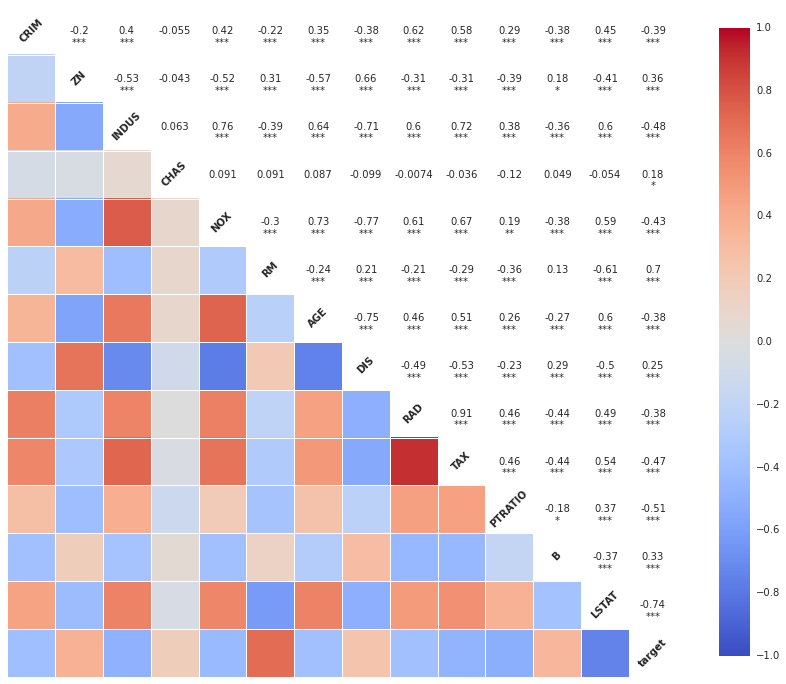

In [29]:
# make a plot of specified dimension (in inches), just a 1x1 subplot
fig, ax = plt.subplots(figsize=(15, 15))
# pass the axis to draw on
sns.corrplot(df, ax=ax)

In case there is just too much attributes we might hide the actual values and put the attribute names aside:

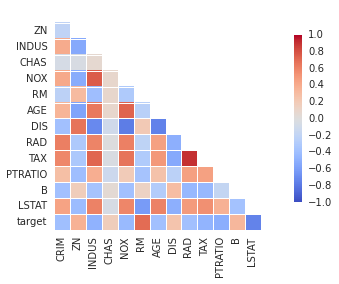

In [30]:
sns.corrplot(df, annot=False, sig_stars=False, diag_names=False)

### Attribute histograms
Next we'd like to plot a histogram of values for each attribute. It acts as an estimation of the probability density function and gives us a better understanding how values of each attribtue look like.

A simple means would be the standard ```hist()``` method from matplotlib:

In [31]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

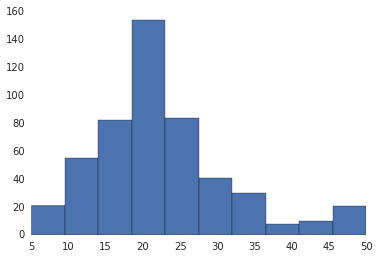

In [32]:
attr = df['MEDV']
plt.hist(attr)

It automatically quantizes the value range into several bins. The number of bins can be specified via a parameter:

(array([  3.,   1.,   7.,   7.,   3.,   6.,   8.,  10.,   8.,  23.,  15.,
         19.,  14.,  16.,  18.,  28.,  36.,  29.,  33.,  28.,  37.,  21.,
         15.,   4.,   7.,  11.,   9.,   9.,   5.,   7.,   7.,   8.,   2.,
          8.,   5.,   4.,   2.,   1.,   1.,   0.,   2.,   2.,   2.,   2.,
          2.,   1.,   1.,   0.,   3.,  16.]),
 array([  5. ,   5.9,   6.8,   7.7,   8.6,   9.5,  10.4,  11.3,  12.2,
         13.1,  14. ,  14.9,  15.8,  16.7,  17.6,  18.5,  19.4,  20.3,
         21.2,  22.1,  23. ,  23.9,  24.8,  25.7,  26.6,  27.5,  28.4,
         29.3,  30.2,  31.1,  32. ,  32.9,  33.8,  34.7,  35.6,  36.5,
         37.4,  38.3,  39.2,  40.1,  41. ,  41.9,  42.8,  43.7,  44.6,
         45.5,  46.4,  47.3,  48.2,  49.1,  50. ]),
 <a list of 50 Patch objects>)

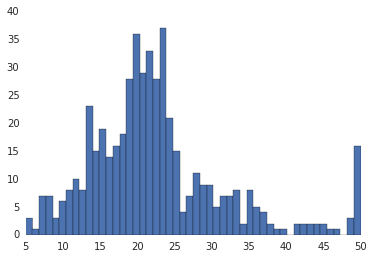

In [33]:
plt.hist(attr, bins=50)

Seaborn has a plot dedicated for distributions - ```distplot()```. Moreover, various possibilities in plotting distributions are beautifully covered in its documentation:<a href='http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html'>Visualizing distributions of data </a>.

```distplot``` is able to combine a histogram with a kernel density estimation (KDE) plot (it looks like a smoothed histogram) into a single plot. For us it would be useful to plot real-valued data.

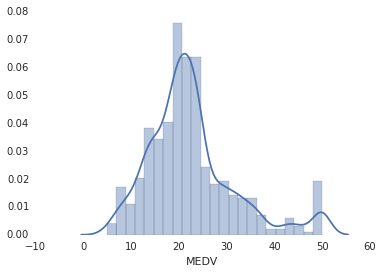

In [34]:
sns.distplot(attr)

However, for integer-valued data (like categories) automatic quantization into a pre-defined number of bins might not be the best option. We'd rather like to quantize according the original distinct values. For that we can just compute this kind of histogram ourselves and use the *bar* plot.

Example for *RAD*: int (category) - index of accessibility to radial highways:

<Container object of 9 artists>

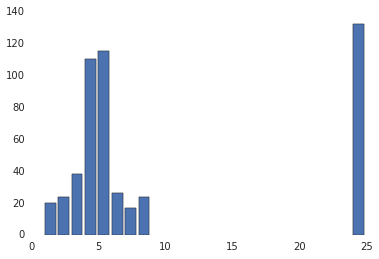

In [35]:
cat_attr = df['RAD']
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts)
# or more compactly:
plt.bar(*list(zip(*cat_attr.value_counts().items())))

### Pair-wise joint plots

So far we've visualized the distribution of values of individual attributes and correlation of attribute pairs. We can dig deeper into the relation of attribute pairs by examining their joint distributions. We'd like a 2D plot with each axis representing the particular attribute range and the points on the plot representing the probability that both attributes have the particular values at once. Also plotting 2D distributions is nicely described with many examples in the seaborn docs.

If we have a few data points we can plot a little dot on that 2D position for each observed point - this is called a scatter plot and is available via ```plt.scatter(X, Y)```.

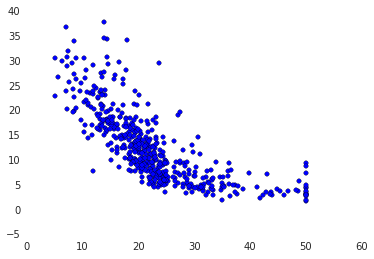

In [36]:
plt.scatter(df['MEDV'], df['LSTAT'])

In [37]:
#set x and y for the next plots, the names are attributes from the data you used (in this case, boston house pricing)
x, y = df['MEDV'], df['LSTAT']

Seaborn enhances this plot by adding a small histogram for both attributes aside and a label with the correlation value and significance:

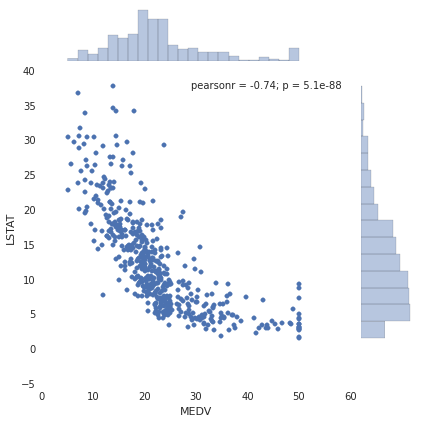

In [38]:
sns.jointplot(x, y, kind='scatter')

Rather than individual observations we'd rather estimate the joint PDF density and plot it color-coded. There are various approaches. Having a lot of data points we can fake it by a scatter plot with semi-transparent markers that add up.

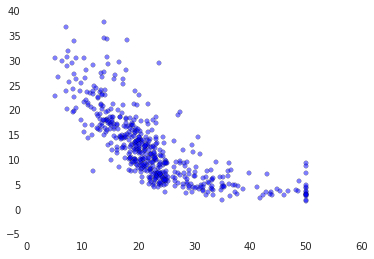

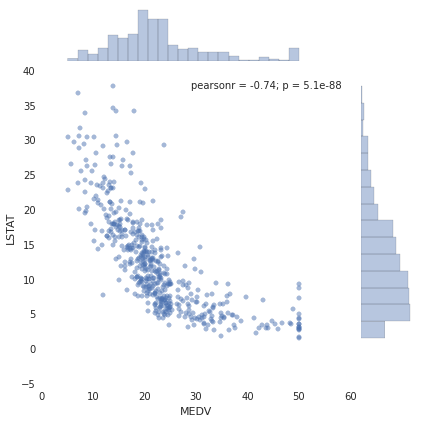

In [39]:
x, y = df['MEDV'], df['LSTAT']
plt.scatter(x, y, alpha=0.5)

# or via jointplot (with histograms aside):
sns.jointplot(x, y, kind='scatter', joint_kws={'alpha':0.5})

Another possibility is to aggregate data points over 2D areas and estimate the PDF this way. Its a 2D generalization of a histogram. We can either use a rectangular grid, or even a hexagonal one.

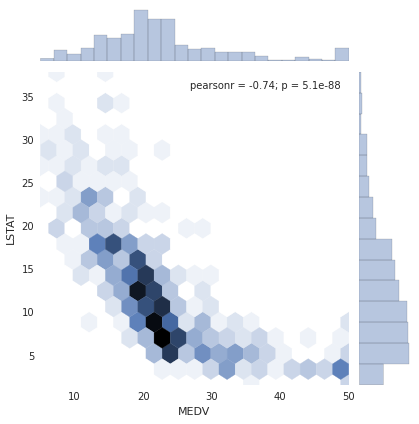

In [40]:
sns.jointplot(df['MEDV'], df['LSTAT'], kind='hex')

Otherwise we can estimate the PDF smoothly by convolving each datapoint with a kernel function. It is possible with ```sns.kdeplot()```.

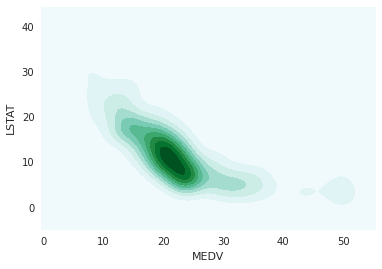

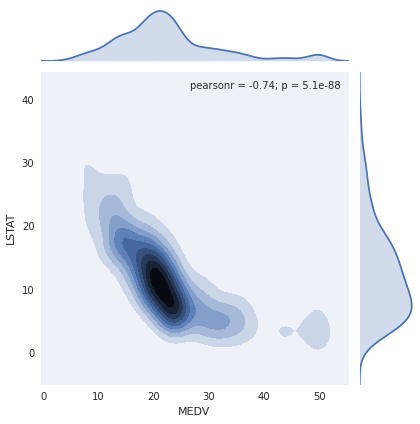

In [41]:
sns.kdeplot(df['MEDV'], df['LSTAT'], shade=True)
# or 
sns.jointplot(df['MEDV'], df['LSTAT'], kind='kde')

Plotting exact observations (as with a scatter plot) may lead to "over-fitting", while plotting smoothed kernel density estimation may lead to to much generalization. A medium trade-off between both is using the hexagon-aggregated 2D histogram. But as always the human observer who will assess the data must use their own judgement.

Pair-wise scatter matrix

There's **N * (N - 1) / 2** unique pairs of attributes, ie. quite a lot. In order to have a big picture for quick overview we might want to display a rough joint distribution plot for each pair in a single image. That's exactly what ```pairplot()``` from seaborn does - scatter plots, one for each pair, are aligned into a matrix and the diagonal is filled with attribute histograms.

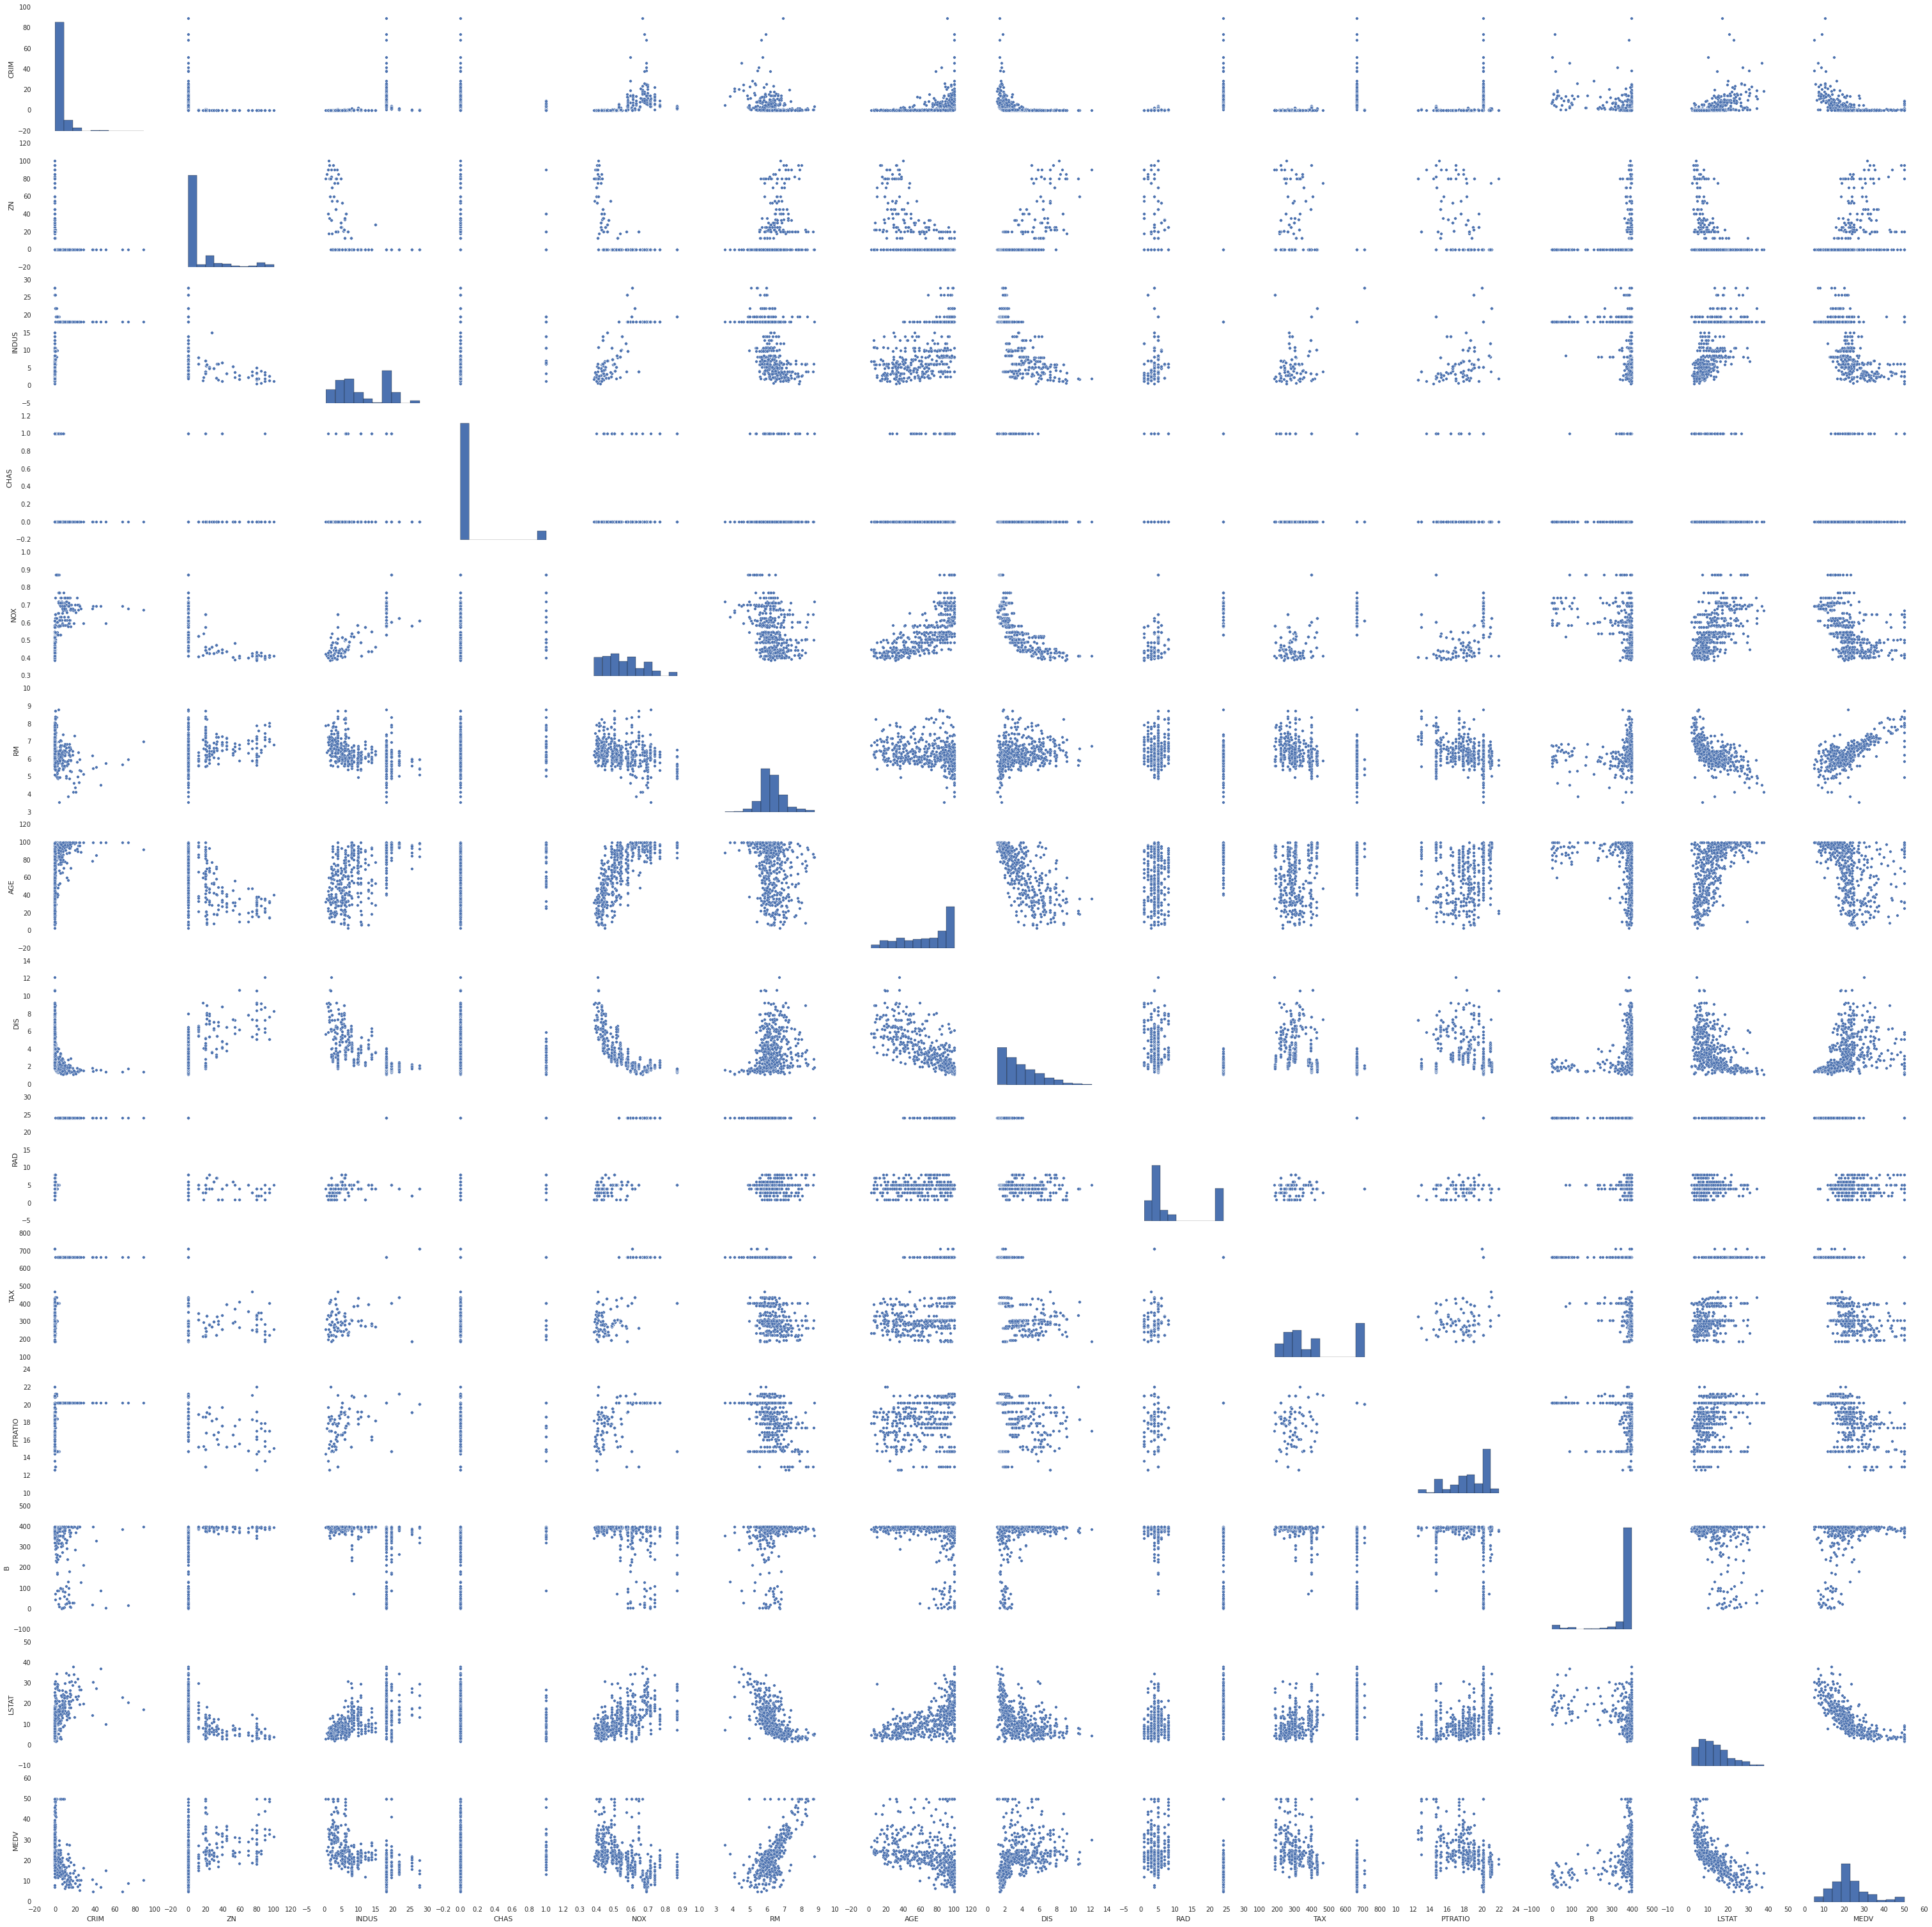

In [42]:
sns.pairplot(df)